# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium


In [2]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [3]:
# a quick look at the data
X.tail(20)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
399980,-73.988745,40.727180,-73.981702,40.774665,1,28,4,0,7,2013,...,1,0,0,0,0,0,1,0,0,0
399981,-73.996040,40.724093,-74.005097,40.719093,5,10,1,6,4,2010,...,1,0,0,0,0,0,1,0,0,0
399982,-73.962047,40.770412,-73.953617,40.767415,1,23,21,4,6,2011,...,1,0,0,0,0,0,1,0,0,0
399983,-73.978382,40.752118,-73.950205,40.786887,4,3,0,3,10,2012,...,1,0,0,0,0,0,1,0,0,0
399984,-73.955378,40.779501,-73.960628,40.771580,1,5,17,0,10,2014,...,1,0,0,0,0,0,1,0,0,0
399985,-73.993896,40.732632,-73.991829,40.744473,1,1,21,5,5,2015,...,1,0,0,0,0,0,1,0,0,0
399986,-74.008813,40.713915,-73.979168,40.757925,1,12,9,2,5,2009,...,1,0,0,0,0,0,1,0,0,0
399987,-73.955360,40.772922,-73.960322,40.766255,3,19,18,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
399988,-73.985319,40.727710,-73.981517,40.741176,1,16,20,1,5,2011,...,1,0,0,0,0,0,1,0,0,0
399989,-73.983200,40.722297,-73.982277,40.735242,1,17,22,2,3,2009,...,1,0,0,0,0,0,1,0,0,0


In [4]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [5]:
X_train = X[X['pickup_year'] < 2015].drop(['pickup_year'], axis = 1)
y_train = y[X['pickup_year'] < 2015]

X_test = X[X['pickup_year'] == 2015].drop(['pickup_year'], axis = 1)
y_test = y[X['pickup_year'] == 2015]

In [6]:
X_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,is_pickup_JFK,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,0,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,0,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,0,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,0,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,0,...,1,0,0,0,0,0,1,0,0,0


In [7]:
y_train.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [8]:
X_test.head(1)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,is_pickup_JFK,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
28,-74.010483,40.717667,-73.985771,40.660366,1,21,21,0,6,0,...,1,0,0,0,0,1,0,0,0,0


In [9]:
y_test.head()

28    22.54
32    58.00
33     4.50
65    11.50
66     5.00
Name: fare_amount, dtype: float64

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [10]:
%%time

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

RFmodel = RandomForestRegressor(max_depth=10,
                                n_estimators=100,
                                n_jobs=-1, 
                                random_state=0)
RFmodel.fit(X_train, y_train)

Wall time: 1min 5s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=0)

In [11]:
%%time

from sklearn.metrics import mean_squared_error

y_train_predict = RFmodel.predict(X_train)

MSEtrain = mean_squared_error(y_train, y_train_predict)

MSEtrain

Wall time: 736 ms


15.316938552052598

In [12]:
%%time

y_test_predict = RFmodel.predict(X_test)

MSEtest = mean_squared_error(y_test, y_test_predict)

MSEtest

Wall time: 79.5 ms


26.71864322263172

In [13]:
diff_train = y_train-y_train_predict

In [14]:
diff_test = y_test-y_test_predict

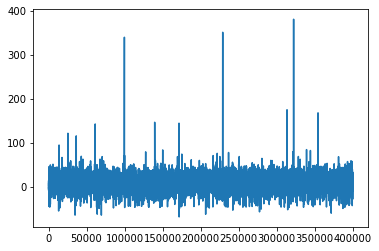

In [15]:
plt.plot(X_train.index, diff_train)

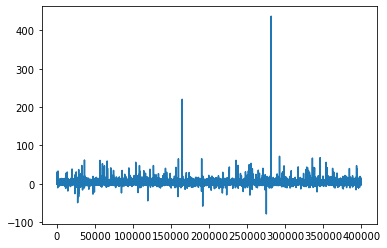

In [16]:
plt.plot(X_test.index, diff_test)

In [17]:
diff_train_error = diff_train[np.abs(diff_train) > 50]
index_train_error = X_train.index[np.abs(diff_train) > 50]

In [18]:
diff_test_error = diff_test[np.abs(diff_test) > 50]
index_test_error = X_test.index[np.abs(diff_test) > 50]


In [19]:
import folium

error_map_test = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)

for i in range(diff_test_error.size):
    folium.CircleMarker([X_test.pickup_latitude[index_test_error[i]], X_test.pickup_longitude[index_test_error[i]]], radius=3,                
                        color="green", 
                        fill_opacity=0.9
                       ).add_to(error_map_test)
    folium.CircleMarker([X_test.dropoff_latitude[index_test_error[i]], X_test.dropoff_longitude[index_test_error[i]]], radius=3,                
                        color="red", 
                        fill_opacity=0.9
                       ).add_to(error_map_test)
    folium.PolyLine([ [X_test.pickup_latitude[index_test_error[i]], X_test.pickup_longitude[index_test_error[i]]] , 
                     [X_test.dropoff_latitude[index_test_error[i]], X_test.dropoff_longitude[index_test_error[i]]]  ], 
                    color="black", 
                    weight=2.5, 
                    opacity=1
                   ).add_to(error_map_test)
    
error_map_test

In [20]:
error_map_train = folium.Map(location = [40.730610,-73.935242],zoom_start = 12,)

for i in range(diff_train_error.size):
    folium.CircleMarker([X_train.pickup_latitude[index_train_error[i]], X_train.pickup_longitude[index_train_error[i]]], radius=3,                
                        color="green", 
                        fill_opacity=0.9
                       ).add_to(error_map_train)
    folium.CircleMarker([X_train.dropoff_latitude[index_train_error[i]], X_train.dropoff_longitude[index_train_error[i]]], radius=3,                
                        color="red", 
                        fill_opacity=0.9
                       ).add_to(error_map_train)
    folium.PolyLine([ [X_train.pickup_latitude[index_train_error[i]], X_train.pickup_longitude[index_train_error[i]]] , 
                     [X_train.dropoff_latitude[index_train_error[i]], X_train.dropoff_longitude[index_train_error[i]]]  ], 
                    color="black", 
                    weight=2.5, 
                    opacity=1
                   ).add_to(error_map_train)
    
error_map_train

--> Ausreiser sind insbesondere bei Fahrten zu den Flughafen (JFK, LaGuardia und Newark) zu beobachten und bei sehr kurzen Strecken (nahezu gleicher Ein- und Ausstiegsort). Evtl. handelt es sich hier eher um Termine, bei denen das Taxi vor der Tür gewartet hat.